# WHAT IS BAYES THEOREM?

http://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/

Bayes theorem is what allows us to go from a sampling (or likelihood) distribution and a prior distribution to a posterior distribution.

For example, we might have data on 1,000 coin flips. Where 1 indicates a head. 

In [9]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

data_coin_flips = np.random.randint(2, size=1000)
np.mean(data_coin_flips)

0.5

# WHAT IS A SAMPLING DISTRIBUTION?
A sampling distribution is the probability of seeing our data (X) given our parameters (θ). This is written as $p(X|θ).$


For example, we might have data on 1,000 coin flips. Where 1 indicates a head. 

In [10]:
data_coin_flips = np.random.randint(2, size=1000)
np.mean(data_coin_flips)

0.496

In [11]:
bernoulli_flips = np.random.binomial(n=1, p=.5, size=1000)
np.mean(bernoulli_flips)

0.502

In [12]:
def bern_pmf(x, p):
    if (x == 1):
        return p
    elif (x == 0):
        return 1 - p
    else:
        return "Value Not in Support of Distribution"

We can use the probability mass function (PMF) of the Bernoulli distribution to get our desired probability for a single coin flip. The PMF takes a single observed data point and then given the parameters (p in our case) returns the probablility of seeing that data point given those parameters. For a Bernoulli distribution it is simple: if the data point is a 1 the PMF returns p, if the data point is a 0 it returns (1-p). We could write a quick function to do this:



In [13]:

print(st.bernoulli.pmf(1, .5))
print(st.bernoulli.pmf(0, .5))

0.5
0.5


This is nice, but what we really want to know is the probability of see all 1,000 of our data points. How do we do that? The trick here is to assume that our data are independent and identically distributed. This assumption allows us to say the probability of seeing all of our data is just the product of each individual probability: $p(x1,…,xn|β)=p(x1|β)∗…∗p(xn|β).$ This is easy to do:

In [14]:
np.product(st.bernoulli.pmf(data_coin_flips, .5))

9.3326361850321888e-302

How does that number help us? Well by itself, it doesn’t really help too much. What we need to do now is get more of a distribution for our sampling model. Currently, we have only tested our model with p = .5, but what if p = .8? or .2? What would the probablility of our data look like then? This can be done by defining a grid of values for our p. Below I will make a grid of 100 values between 0 and 1 (because p has to be between 0 and 1) and then I will calculate the probability of seeing our data given each of these values:

# PRIOR DISTRIBUTION

Bayes theorem says that we need to think about both our sampling distribution and our prior distribution. What do I mean by prior distribution? It is the $p(θ)$ or the probability of seeing a specific value for our parameter. In our sampling distribution we defined 100 values from 0 to 1 for our parameter p. Now we must define the prior probability of seeing each of those values. That is the probability we would have assumed before seeing any data. Most likely, we would have assumed a fair coin, which looks like the distribution above. Lets see how we can do this:

Basically we created 1,000 fair coin flips and then generated the sampling distribution like we did before (except we divided by the sum of the sampling distribution to make the values sum to 1). Now we have a “fair coin” prior on our parameters. This basically means that before we saw any data we thought coin flips were fair. And we can see that assumption in our prior distribution by the fact that our prior distribution peaks at .5 and is almost all between .4 and .6.

I know what you are thinking – this is pretty boring. The sampling and prior distributions look exactly the same. So lets mix things up. Lets keep our fair prior but change our data to be an unfair coin:

Ah – now this is interesting. We have strong data evidence of an unfair coin (since we generated the data we know it is unfair with p=.8), but our prior beliefs are telling us that coins are fair. How do we deal with this?

# BAYES THEOREM (POSTERIOR DISTRIBUTION)

Bayes theorem is what allows us to go from our sampling and prior distributions to our posterior distribution. The posterior distribution is the $P(θ|X)$. Or in English, the probability of our parameters given our data. And if you think about it that is what we really want. We are typically given our data – from maybe a survey or web traffic – and we want to figure out what parameters are most likely given our data. So how do we get to this posterior distribution? Here comes some math (don’t worry it is not too bad):

By definition, we know that (If you don’t believe me, check out this page for a refresher):

$P(A|B) = \dfrac{P(A,B)}{P(B)}$ Or in English, the probability of seeing A given B is the probability of seeing them both divided by the probability of B.
$P(B|A) = \dfrac{P(A,B)}{P(A)}$ Or in English, the probability of seeing B given A is the probability of seeing them both divided by the probability of A.
You will notice that both of these values share the same numerator, so:

$P(A,B) = P(A|B)*P(B)$
$P(A,B) = P(A|B)*P(B)$
Thus:

$P(A|B)*P(B) = P(B|A)*P(A)$

Which implies:

$P(A|B) = \dfrac{P(B|A)*P(A)}{P(B)}$

And plug in $θ$ for $A$ and $X$ for $B$:

$P(\theta|X) = \dfrac{P(X|\theta)*P(\theta)}{P(X)}$

Nice! Now we can plug in some terminology we know:

$Posterior = \dfrac{likelihood * prior}{P(X)}$

But what is the $P(X)?$ Or in English, the probability of our data? That sounds weird… Let’s go back to some math and use B and A again:

We know that $P(B)=∑AP(A,B)$ (check out this page for a refresher)

And from our definitions above, we know that:

$P(A,B) = P(A|B)*P(A)$

Thus:

$P(B) = \sum_{A} P(A|B)*P(A)$

Plug in our $θ$ and $X$:

$P(X) = \sum_{\theta} P(\theta|X)*P(\theta)$

Plug in our terminology:

$P(X) = \sum_{\theta} likelihood * prior$

Wow! Isn’t that awesome! But what do we mean by $∑θ$. This means to sum over all the values of our parameters. In our coin flip example, we defined 100 values for our parameter p, so we would have to calculated the likelihood * prior for each of these values and sum all those anwers. That is our denominator for Bayes Theorem. Thus our final answer for Bayes is:

$Posterior = \dfrac{likelihood * prior}{\sum_{\theta} likelihood * prior}$

That was a lot of text. Let’s do some more coding and put everything together.

In [29]:
def bern_post(n_params=100, n_sample=100, true_p=.8, prior_p=.5, n_prior=100):
    params = np.linspace(0, 1, n_params)
    sample = np.random.binomial(n=1, p=true_p, size=n_sample)
    likelihood = np.array([np.product(st.bernoulli.pmf(sample, p)) for p in params])
    #likelihood = likelihood / np.sum(likelihood)
    prior_sample = np.random.binomial(n=1, p=prior_p, size=n_prior)
    prior = np.array([np.product(st.bernoulli.pmf(prior_sample, p)) for p in params])
    prior = prior / np.sum(prior)
    posterior = [prior[i] * likelihood[i] for i in range(prior.shape[0])]
    posterior = posterior / np.sum(posterior)

    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8,8))
    axes[0].plot(params, likelihood)
    axes[0].set_title("Sampling Distribution")
    axes[1].plot(params, prior)
    axes[1].set_title("Prior Distribution")
    axes[2].plot(params, posterior)
    axes[2].set_title("Posterior Distribution")
    sns.despine()
    plt.tight_layout()

    return posterior

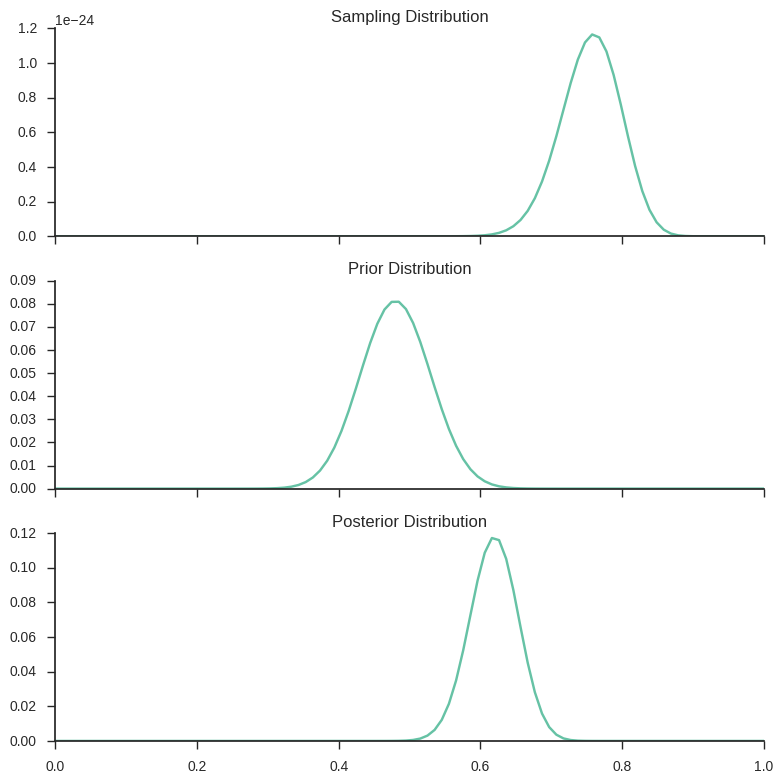

In [30]:
example_post = bern_post()

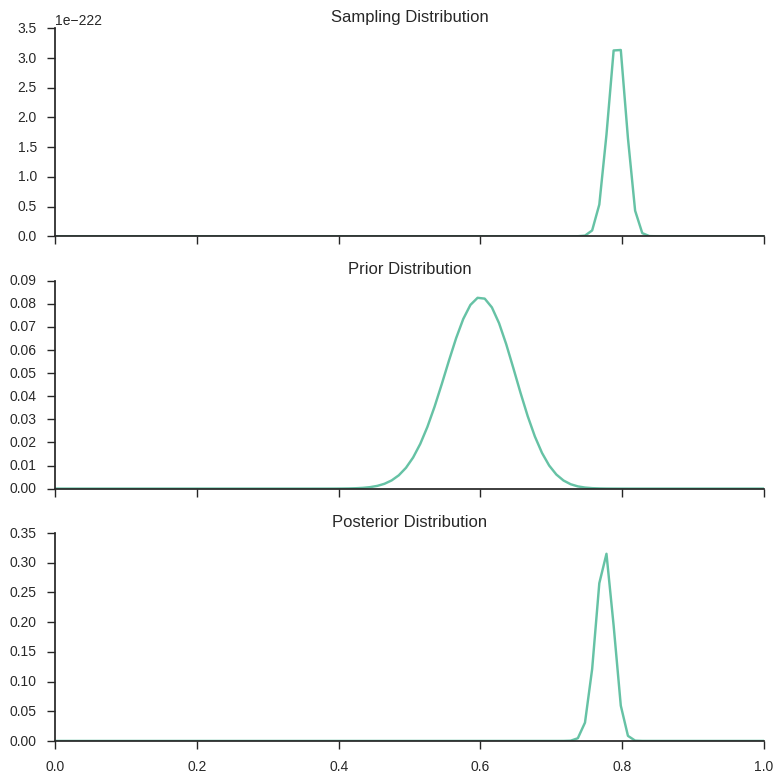

In [31]:
moredata_post = bern_post(n_sample=1000)